In [38]:
import pandas as pd

In [39]:
reviews = pd.read_csv('e-commerceReviews.csv')

In [40]:
reviews.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


So basically what I want to do is, extract the keywords from reviews which best describe the product !

Before that some data pre-processing !

In [41]:
reviews.dropna(inplace=True)

In [42]:
reviews.shape

(19662, 11)

In [43]:
from string import punctuation

In [44]:
punc = list(punctuation)

In [45]:
reviews['Default Review'] = reviews['Review Text']

In [46]:
def text(inp):
    inp = inp.split()
    li = [w for w in inp if w not in punc]
    return ' '.join(li).strip(' ')
reviews['Review Text'] = reviews['Review Text'].apply(text)

In [47]:
reviews.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Default Review
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"I love, love, love this jumpsuit. it's fun, fl..."
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,"I love tracy reese dresses, but this one is no..."
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,I aded this in my basket at hte last mintue to...


In [49]:
def text(inp):
    inp = inp.split()
    li = [w.lower() for w in inp]
    return ' '.join(li).strip(' ')
reviews['Review Text'] = reviews['Review Text'].apply(text)

In [50]:
reviews.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Default Review
2,2,1077,60,Some major design flaws,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...
3,3,1049,50,My favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"I love, love, love this jumpsuit. it's fun, fl..."
4,4,847,47,Flattering shirt,this shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...
5,5,1080,49,Not for the very petite,"i love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,"I love tracy reese dresses, but this one is no..."
6,6,858,39,Cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,I aded this in my basket at hte last mintue to...


In [51]:
from nltk.corpus import stopwords

In [52]:
stop = stopwords.words('english')

In [53]:
def text(inp):
    inp = inp.split()
    li = [w for w in inp if w not in stop]
    return ' '.join(li).strip(' ')
reviews['Review Text'] = reviews['Review Text'].apply(text)

In [ ]:
#from autocorrect import spell

In [ ]:
#    def text(inp):
#        inp = inp.split()
#        li = [spell(w) for w in inp]
#        return ' '.join(li).strip(' ')
#    reviews['Review Text'] = reviews['Review Text'].apply(text)

In [54]:
from nltk.stem import WordNetLemmatizer

wordnet = WordNetLemmatizer()

def text(inp):
    inp = inp.split()
    li = [wordnet.lemmatize(w) for w in inp]
    return ' '.join(li).strip(' ')
reviews['Review Text'] = reviews['Review Text'].apply(text)

In [55]:
import nltk

In [57]:
def text(inp):
    inp = inp.split()
    li = [w for w in inp if nltk.pos_tag([w])[0][1]=='JJ' or nltk.pos_tag([w])[0][1]=='JJR' or nltk.pos_tag([w])[0][1]=='JJS']
    return li
reviews['Review Adjectives'] = reviews['Review Text'].apply(text)

Since I am working on women dresses, I am taking adjectives. If it was something else like mobile phone, nouns like battery, charger etc. would have made more sense !

In [58]:
reviews.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Default Review,Review Adjectives
2,2,1077,60,Some major design flaws,high hope dress really wanted work me. initial...,3,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...,"[high, small, usual, small, comfortable, sever..."
3,3,1049,50,My favorite buy!,"love, love, love jumpsuit. fun, flirty, fabulo...",5,1,0,General Petite,Bottoms,Pants,"I love, love, love this jumpsuit. it's fun, fl...",[great]
4,4,847,47,Flattering shirt,shirt flattering due adjustable front tie. per...,5,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...,"[due, adjustable]"
5,5,1080,49,Not for the very petite,"love tracy reese dresses, one petite. 5 foot t...",2,0,4,General,Dresses,Dresses,"I love tracy reese dresses, but this one is no...","[full, overwhelmed, small]"
6,6,858,39,Cagrcoal shimmer fun,aded basket hte last mintue see would look lik...,5,1,1,General Petite,Tops,Knits,I aded this in my basket at hte last mintue to...,"[last, little]"


In [59]:
import matplotlib.pyplot as plt

In [60]:
def plot(i): 
    print('Item id :',i)
    plt.subplots(figsize=(15,10))
    list1=[]
    data = reviews[reviews['Clothing ID']==i]
    for j in data['Review Adjectives']:
        list1.extend(j)
    ax = pd.Series(list1).value_counts()[:20].sort_values(ascending=True).plot.barh(width=0.9)
    for i, v in enumerate(pd.Series(list1).value_counts()[:20].sort_values(ascending=True).values): 
        ax.text(0.3, i, v,fontsize=12,color='white',weight='bold')    
    plt.show()

Item id : 1078


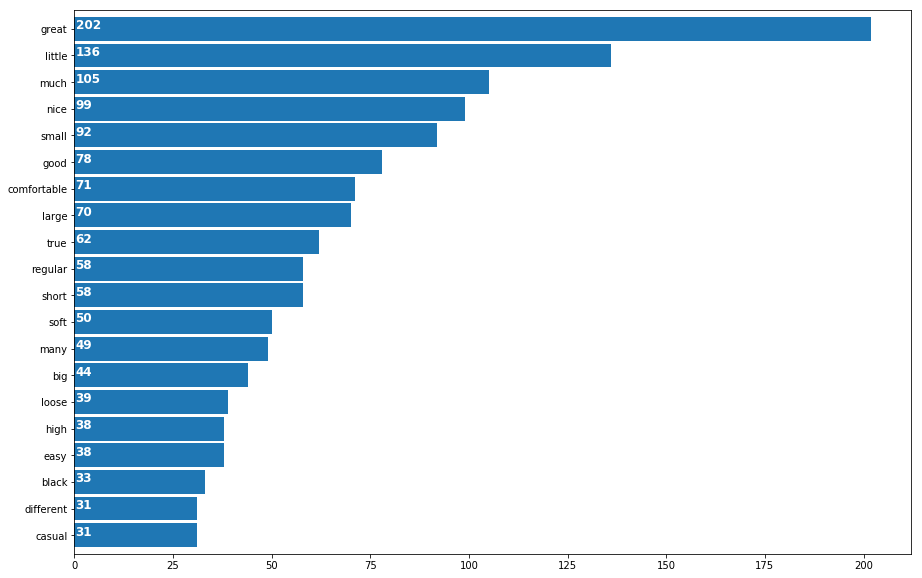

In [61]:
plot(1078)

Now this looks good but it is not very informative since there are certain words which don't really describe much meaning to our context. Like 'much', 'little', 'true', 'many' etc. are not the words a potential buyer might be interested in to know about the product. And obviously I can't make a list of these words and remove them sincec first, I don't know how much of these non-informative words are there for the products present and second, removing them may produce words that are even more misleading and irrelevant than the ones we have now. So let's try to solve the problem with something else !

First let me clean the text more !

In [62]:
def text(inp):
    inp = inp.split()
    li = [w.strip('.') for w in inp]
    return ' '.join(li).strip(' ')
reviews['Review Text'] = reviews['Review Text'].apply(text)

In [63]:
def text(inp):
    inp = inp.split()
    li = [w.strip('(') for w in inp]
    return ' '.join(li).strip(' ')
reviews['Review Text'] = reviews['Review Text'].apply(text)

In [64]:
def text(inp):
    inp = inp.split()
    li = [w.strip(')') for w in inp]
    return ' '.join(li).strip(' ')
reviews['Review Text'] = reviews['Review Text'].apply(text)

In [65]:
def text(inp):
    inp = inp.split()
    li = [w.strip(',') for w in inp]
    return ' '.join(li).strip(' ')
reviews['Review Text'] = reviews['Review Text'].apply(text)

In [66]:
def text(inp):
    inp = inp.split()
    li = [w.strip('!') for w in inp]
    return ' '.join(li).strip(' ')
reviews['Review Text'] = reviews['Review Text'].apply(text)

I could have done the above punctuation directly connected to the word like 'hello.' rather than 'hello .' removal by using string library but I am lazy, so copy pasting some specific punctuation marks felt faster to me though by coding standards you should remove all the punctuation directly connected to the words by using the punctuation list in string library

In [67]:
reviews.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Default Review,Review Adjectives
2,2,1077,60,Some major design flaws,high hope dress really wanted work me initiall...,3,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...,"[high, small, usual, small, comfortable, sever..."
3,3,1049,50,My favorite buy!,love love love jumpsuit fun flirty fabulous ev...,5,1,0,General Petite,Bottoms,Pants,"I love, love, love this jumpsuit. it's fun, fl...",[great]
4,4,847,47,Flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...,"[due, adjustable]"
5,5,1080,49,Not for the very petite,love tracy reese dresses one petite 5 foot tal...,2,0,4,General,Dresses,Dresses,"I love tracy reese dresses, but this one is no...","[full, overwhelmed, small]"
6,6,858,39,Cagrcoal shimmer fun,aded basket hte last mintue see would look lik...,5,1,1,General Petite,Tops,Knits,I aded this in my basket at hte last mintue to...,"[last, little]"


In [68]:
from nltk.collocations import *

In [69]:
def extract_bigrams(text):

        bigrams = []

        tokens = text
        tokens = nltk.word_tokenize(tokens.lower())
        tokens = [word for word in tokens if len(word) > 2]
        bigram_measures = nltk.collocations.BigramAssocMeasures()
        finder = BigramCollocationFinder.from_words(tokens)
        top_bigrams = finder.nbest(bigram_measures.pmi, 10000)

        for bg in top_bigrams:
            bg = " ".join(bg)
            tag = nltk.pos_tag([bg])[0]

            if tag[1] not in ['VBG', 'RB', 'VB', 'VBD', 'VBN', 'VBP', 'VBZ', 'PRP', 'IN', 'DT', 'CC', 'PRP$']:
                x = tag[0].replace(' ','-')
                bigrams.append(x)

        return bigrams 

In [70]:
reviews['bigrams'] = reviews['Review Text'].apply(extract_bigrams)

In [71]:
reviews.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Default Review,Review Adjectives,bigrams
2,2,1077,60,Some major design flaws,high hope dress really wanted work me initiall...,3,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...,"[high, small, usual, small, comfortable, sever...","[comfortable-fit, could-zip, design-flaw, dire..."
3,3,1049,50,My favorite buy!,love love love jumpsuit fun flirty fabulous ev...,5,1,0,General Petite,Bottoms,Pants,"I love, love, love this jumpsuit. it's fun, fl...",[great],"[every-time, fabulous-every, flirty-fabulous, ..."
4,4,847,47,Flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...,"[due, adjustable]","[adjustable-front, cardigan-love, due-adjustab..."
5,5,1080,49,Not for the very petite,love tracy reese dresses one petite 5 foot tal...,2,0,4,General,Dresses,Dresses,"I love tracy reese dresses, but this one is no...","[full, overwhelmed, small]","[away-embellishment, color-idea, dresses-one, ..."
6,6,858,39,Cagrcoal shimmer fun,aded basket hte last mintue see would look lik...,5,1,1,General Petite,Tops,Knits,I aded this in my basket at hte last mintue to...,"[last, little]","[aded-basket, bummer-petite, decided-jkeep, ej..."


In [72]:
reviews['bi'] = reviews['bigrams'].apply(lambda text: ' '.join(text))

In [73]:
reviews.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Default Review,Review Adjectives,bigrams,bi
2,2,1077,60,Some major design flaws,high hope dress really wanted work me initiall...,3,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...,"[high, small, usual, small, comfortable, sever...","[comfortable-fit, could-zip, design-flaw, dire...",comfortable-fit could-zip design-flaw directly...
3,3,1049,50,My favorite buy!,love love love jumpsuit fun flirty fabulous ev...,5,1,0,General Petite,Bottoms,Pants,"I love, love, love this jumpsuit. it's fun, fl...",[great],"[every-time, fabulous-every, flirty-fabulous, ...",every-time fabulous-every flirty-fabulous fun-...
4,4,847,47,Flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...,"[due, adjustable]","[adjustable-front, cardigan-love, due-adjustab...",adjustable-front cardigan-love due-adjustable ...
5,5,1080,49,Not for the very petite,love tracy reese dresses one petite 5 foot tal...,2,0,4,General,Dresses,Dresses,"I love tracy reese dresses, but this one is no...","[full, overwhelmed, small]","[away-embellishment, color-idea, dresses-one, ...",away-embellishment color-idea dresses-one embe...
6,6,858,39,Cagrcoal shimmer fun,aded basket hte last mintue see would look lik...,5,1,1,General Petite,Tops,Knits,I aded this in my basket at hte last mintue to...,"[last, little]","[aded-basket, bummer-petite, decided-jkeep, ej...",aded-basket bummer-petite decided-jkeep ejans-...


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [75]:
v = TfidfVectorizer(max_features=5000)

In [76]:
x = v.fit_transform(reviews['bi'])

In [77]:
v.get_feature_names()

['00',
 '00p',
 '0petite',
 '10',
 '100',
 '100lbs',
 '102',
 '102lbs',
 '103',
 '103lbs',
 '104',
 '105',
 '105lbs',
 '106',
 '107',
 '107lb',
 '107lbs',
 '108',
 '109',
 '109lbs',
 '10p',
 '11',
 '110',
 '110lb',
 '110lbs',
 '111',
 '112',
 '112lbs',
 '113',
 '113lbs',
 '114',
 '115',
 '115lbs',
 '116',
 '116lbs',
 '117',
 '117lbs',
 '118',
 '118lbs',
 '119',
 '12',
 '120',
 '120lb',
 '120lbs',
 '122',
 '123',
 '123lbs',
 '124',
 '124lbs',
 '125',
 '125lb',
 '125lbs',
 '126',
 '127',
 '127lbs',
 '128',
 '128lbs',
 '129lbs',
 '12p',
 '130',
 '130lb',
 '130lbs',
 '132',
 '133',
 '134',
 '135',
 '135lb',
 '135lbs',
 '136',
 '137',
 '138',
 '138lbs',
 '14',
 '140',
 '140lb',
 '140lbs',
 '142',
 '143',
 '144',
 '144lb',
 '145',
 '145lb',
 '145lbs',
 '146',
 '146lbs',
 '147',
 '148',
 '15',
 '150',
 '150lbs',
 '155',
 '155lbs',
 '158',
 '16',
 '160',
 '160lb',
 '160lbs',
 '165',
 '168',
 '170',
 '170lbs',
 '175',
 '180',
 '185',
 '19',
 '1920s',
 '1940',
 '1960s',
 '1970',
 '1st',
 '20',
 

In [78]:
review = v.get_feature_names()
def feature(inp):
    li = set()
    for i in inp:
        for j in review:
            if j in i:
                li.add(i)
    return li
reviews['items']=reviews['bigrams'].apply(feature)

In [79]:
reviews.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Default Review,Review Adjectives,bigrams,bi,items
2,2,1077,60,Some major design flaws,high hope dress really wanted work me initiall...,3,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...,"[high, small, usual, small, comfortable, sever...","[comfortable-fit, could-zip, design-flaw, dire...",comfortable-fit could-zip design-flaw directly...,"{flaw-net, tight-layer, nicely-bottom, could-z..."
3,3,1049,50,My favorite buy!,love love love jumpsuit fun flirty fabulous ev...,5,1,0,General Petite,Bottoms,Pants,"I love, love, love this jumpsuit. it's fun, fl...",[great],"[every-time, fabulous-every, flirty-fabulous, ...",every-time fabulous-every flirty-fabulous fun-...,"{nothing-great, great-compliments, wear-get, l..."
4,4,847,47,Flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...,"[due, adjustable]","[adjustable-front, cardigan-love, due-adjustab...",adjustable-front cardigan-love due-adjustable ...,"{tie-perfect, adjustable-front, well-cardigan,..."
5,5,1080,49,Not for the very petite,love tracy reese dresses one petite 5 foot tal...,2,0,4,General,Dresses,Dresses,"I love tracy reese dresses, but this one is no...","[full, overwhelmed, small]","[away-embellishment, color-idea, dresses-one, ...",away-embellishment color-idea dresses-one embe...,"{narrowing-skirt, reese-dresses, away-embellis..."
6,6,858,39,Cagrcoal shimmer fun,aded basket hte last mintue see would look lik...,5,1,1,General Petite,Tops,Knits,I aded this in my basket at hte last mintue to...,"[last, little]","[aded-basket, bummer-petite, decided-jkeep, ej...",aded-basket bummer-petite decided-jkeep ejans-...,"{look-like, mintue-see, little-baggy, bummer-p..."


In [80]:
def plot2(i): 
    print('Item id :',i)
    plt.subplots(figsize=(15,10))
    list1=[]
    data = reviews[reviews['Clothing ID']==i]
    for j in data['items']:
        list1.extend(j)
    ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9)
    for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
        ax.text(0.3, i, v,fontsize=12,color='white',weight='bold')    
    plt.show()

Item id : 1078


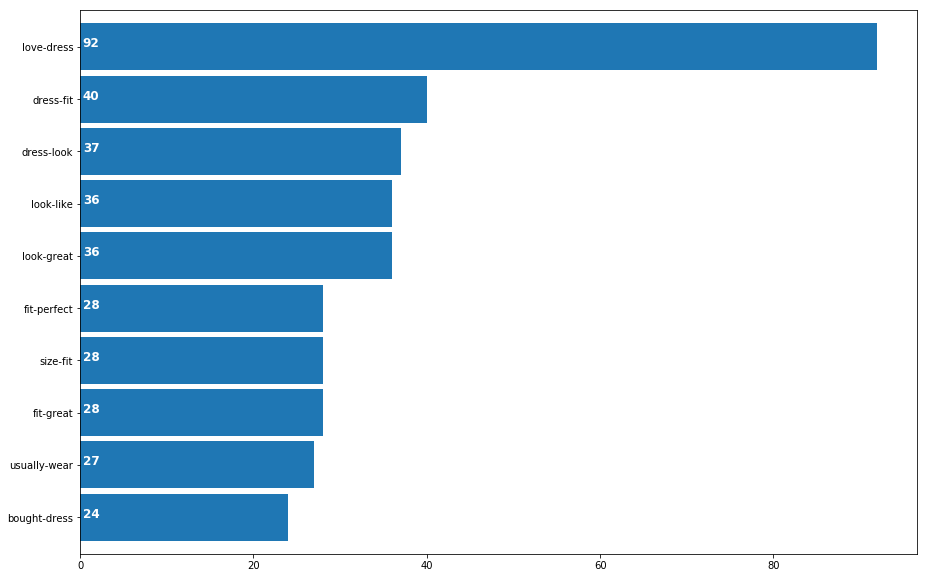

In [81]:
plot2(1078)

In [82]:
def item(inp):
    li = set()
    for i in inp:
        j = i.split('-')
        if j[0].isalpha() and j[1].isalpha:
            if (nltk.pos_tag([j[0]])[0][1]=='JJ'):
                li.add(i)
    return list(li)
reviews['items1'] = reviews['items'].apply(item)

In [83]:
def plot3(i): 
    print('Item id :',i)
    plt.subplots(figsize=(15,10))
    list1=[]
    data = reviews[reviews['Clothing ID']==i]
    for j in data['items1']:
        list1.extend(j)
    ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9)
    for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
        ax.text(0.3, i, v,fontsize=12,color='white',weight='bold')    
    plt.show()

Now let's try to find the most used words for a dress having high reviews

In [84]:
reviews['Clothing ID'].value_counts()

1078    871
862     658
1094    651
1081    487
829     452
872     450
1110    419
868     370
895     336
867     291
936     289
1095    287
850     280
1077    251
1059    247
863     243
1086    241
1080    241
860     237
1083    214
861     203
873     197
1033    190
927     187
1092    187
828     181
1056    180
820     177
836     172
1022    172
       ... 
232       1
120       1
105       1
104       1
88        1
56        1
1191      1
1175      1
1143      1
1127      1
568       1
584       1
600       1
648       1
89        1
73        1
41        1
25        1
9         1
1176      1
1160      1
1064      1
856       1
808       1
792       1
776       1
744       1
728       1
712       1
16        1
Name: Clothing ID, Length: 1095, dtype: int64

Item id : 1094


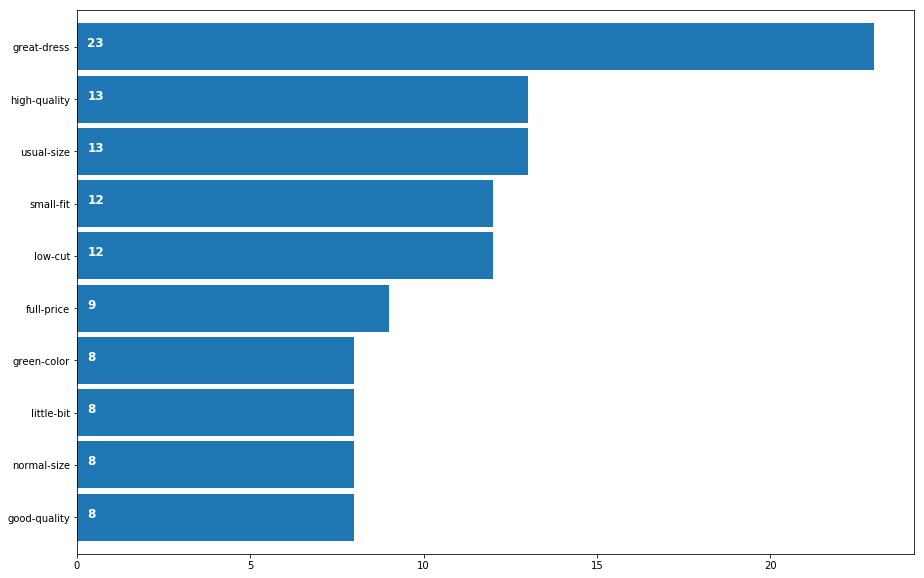

In [85]:
plot3(1094)

So imagine how easy it would be for a potential buyer to comprehend from this graph (maybe you don't want graph maybe you just want text with number of people who said that or something). One thing people would also like is seeing what the reviews say who have mentioned these words for example : for the word 'high-quality' I might want to check what the reviewers have mentioned that the dress is high quality have said as in the entire review. Doing that is pretty easy !

In [88]:
def reviewsaid(text):
    text = text.lower()
    text = text.replace(' ','-')
    for i,j in reviews.iterrows():
        if text in j['items1']:
            print('Review :',j['Default Review'])
            print('------------------------------------------------------------------------------------')

In [89]:
reviewsaid('High Quality')

Review : I love these culottes and i think they will be everywhere this coming spring / summer. the high waist is perfect and looks great with shorter shirts or tucked-in. the denim is high quality and a nice medium dark color.
------------------------------------------------------------------------------------
Review : I am 5'2" 125 pounds and i bought the 4p. the fabric is high quality and does not cling at all but instead drapes and in a very flattering way. add that to the cut of this jumpsuit and you have elongating, very flattering lines. i could not be more pleased and regret not having bought this item earlier, since i would have enjoyed wearing it during the holidays. as other reviewers said, it is adorable and a winner.
------------------------------------------------------------------------------------
Review : This dress is perfect. i'm literally wearing it right now. it's crazy comfortable while still being flattering. it looks and feels high quality, and just barely doesn

Review : I love these bottoms. great colors. i also love the feel of the bottoms, very soft. high quality.
------------------------------------------------------------------------------------
Review : Just got these mara hoffman classic bikini bottoms in flight azure print.today and love them: high quality, fully lined and reversible. the pattern placement is perfectly symmetrical and the colors are just like the online photos.
.
i think the size chart on the mara hoffman site is correct for where the bottoms sit on my body, above the widest part. i have a a-shape with smaller waist and hips, full behind and thighs (currently 33-25-37ish, 38" at the widest which is at my thighs). in these t
------------------------------------------------------------------------------------
Review : High quality, and worth full price.... but way too small. also a bit short in the torso.
------------------------------------------------------------------------------------
Review : It broke my heart to ha